In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
game_settings = json.loads(open('game_settings.json').read())

In [3]:
games = []
for game_setting in game_settings:
    games.append(game_setting['game'])
# games = ['prisoner-dilemma', 'battle-of-sexes', 'hawk-dove', 'stag-hunt']
# games

In [4]:
# total_points = {game: np.zeros((10, 2, 5)) for game in games}
# min_points = {game: np.zeros((10, 2, 5)) for game in games}

# for game in games:
#     idx = 0
#     for num_conversation_rounds in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
        
#         for include_moderator in [False, True]:
#             for i in range(5):
#                 df = pd.read_csv(f'./logs3/{game}/game_{num_conversation_rounds}_{include_moderator}_{i}.csv')
#                 df['total_points'] = df['points_A'] + df['points_B']
#                 df['min_points'] = df[['points_A', 'points_B']].min(axis=1)
#                 total_points[game][idx][int(include_moderator)][i] = df.iloc[-1]['total_points']
#                 min_points[game][idx][int(include_moderator)][i] = df.iloc[-1]['min_points']
#         idx += 1
                

In [5]:
total_points = {game: np.zeros((10, 2, 5)) for game in games}
min_points = {game: np.zeros((10, 2, 5)) for game in games}
equality = {game: np.zeros((10, 2, 5)) for game in games}
quantitative = {game: np.zeros((10, 2, 5)) for game in games}
qualitative = {game: np.zeros((10, 2, 5)) for game in games}
for game in games:
    if game == "prisoner-dilemma":
        max_points = 50
        min = 0
    elif game == "battle-of-sexes":
        max_points = 30
        min = 0
    elif game == "hawk-dove":
        max_points = 0
        min = -20
    elif game == "deadlock":
        max_points = 30
        min = 0
    elif game == "stag-hunt":
        max_points = 100
        min = 10
    idx = 0
    for num_conversation_rounds in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
        for include_moderator in [False, True]:
            for i in range(5):
                df = pd.read_csv(f'./logs4/{game}/game_{num_conversation_rounds}_{include_moderator}_{i}.csv')
                
            
                # Normalize points_A and points_B
                df['points_A'] = (df['points_A'] - min) / (max_points - min)
                df['points_B'] = (df['points_B'] - min) / (max_points - min)
                df['T_A'] = df['T_A']/10
                df['T_B'] = df['T_B']/10
                
                
                df['total_points'] = df['points_A'] + df['points_B']
                df['min_points'] = df[['points_A', 'points_B']].min(axis=1)
                df['quantitative'] = df['points_A'] + df['points_B'] - abs(df['points_A'] - df['points_B'])
                df['qualitative'] = 1*(df['T_A'] + df['T_B'])
                df['equality'] = df['points_A'] + df['points_B'] - abs(df['points_A'] - df['points_B']) + 1*(df['T_A'] + df['T_B'])
                total_points[game][idx][int(include_moderator)][i] = df.iloc[-1]['total_points']
                min_points[game][idx][int(include_moderator)][i] = df.iloc[-1]['min_points']
                quantitative[game][idx][int(include_moderator)][i] = df.iloc[-1]['quantitative']
                qualitative[game][idx][int(include_moderator)][i] = df.iloc[-1]['qualitative']
                equality[game][idx][int(include_moderator)][i] = df.iloc[-1]['equality']
        idx += 1
                

In [13]:
for game in games:
    quantitative_flat = quantitative[game].flatten()
    qualitative_flat = qualitative[game].flatten()
    
    correlation_matrix = np.corrcoef(quantitative_flat, qualitative_flat)
    correlation = correlation_matrix[0, 1]  # Get the correlation coefficient
    print("GAME: ", game)
    print("Correlation coefficient:", correlation)

GAME:  prisoner-dilemma
Correlation coefficient: 0.46070776546876263
GAME:  battle-of-sexes
Correlation coefficient: 0.13511593690832466
GAME:  hawk-dove
Correlation coefficient: 0.5013400882968263
GAME:  deadlock
Correlation coefficient: -0.13535680959066676
GAME:  stag-hunt
Correlation coefficient: 0.3868790155045434


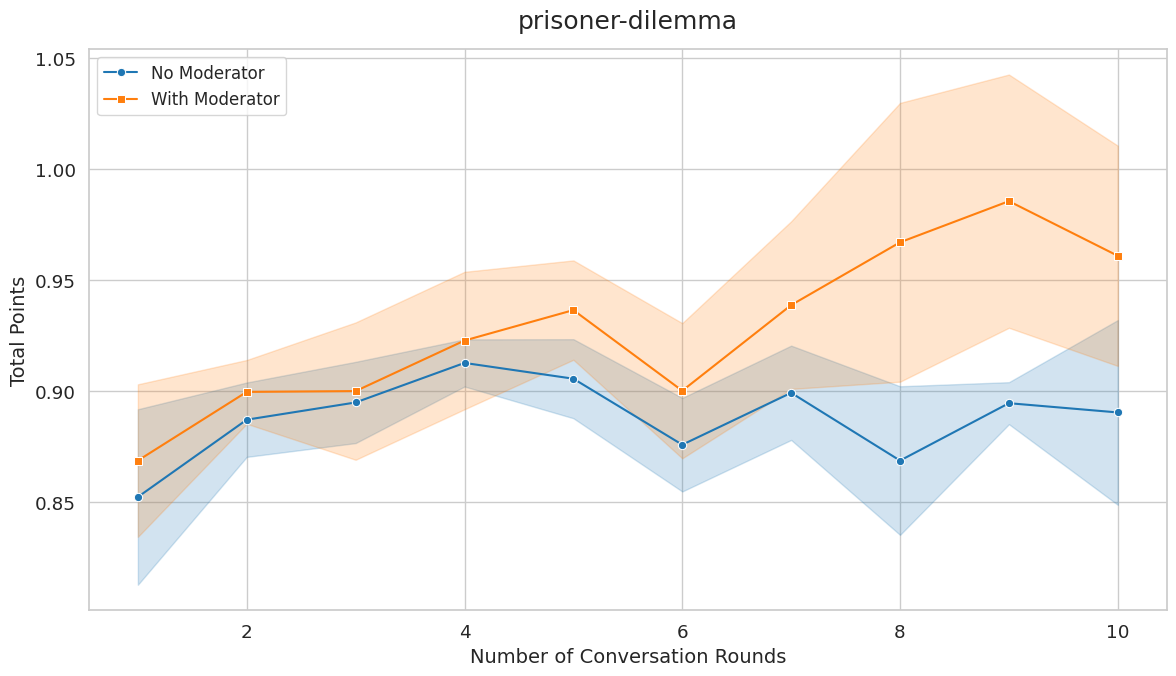

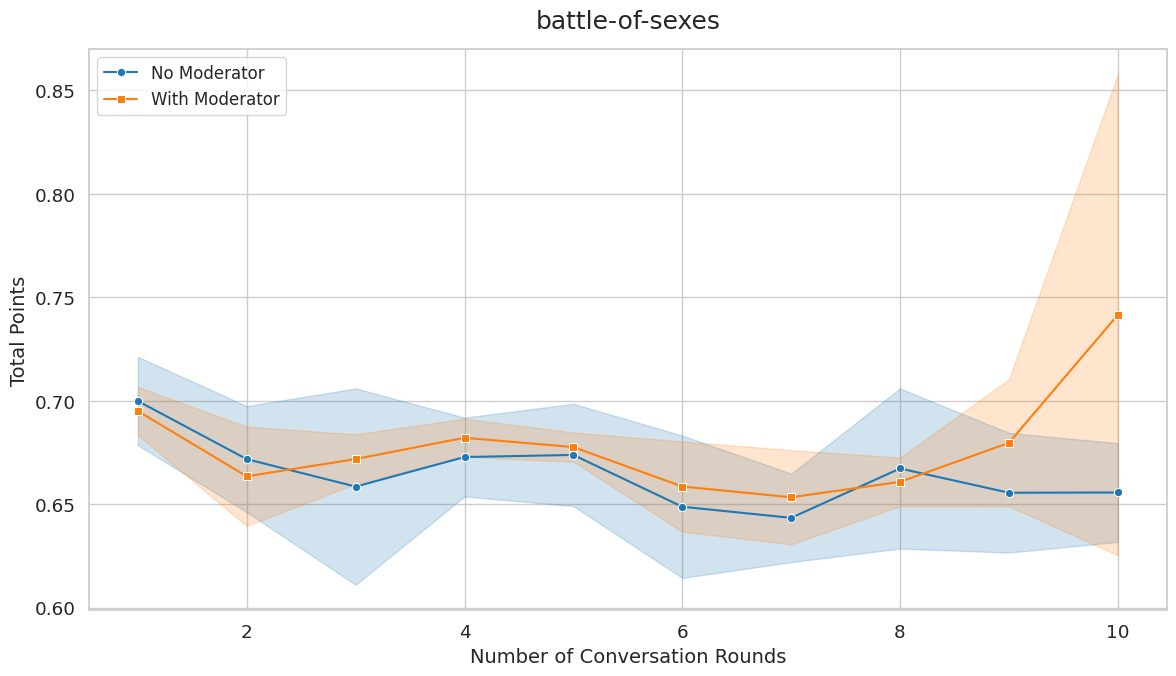

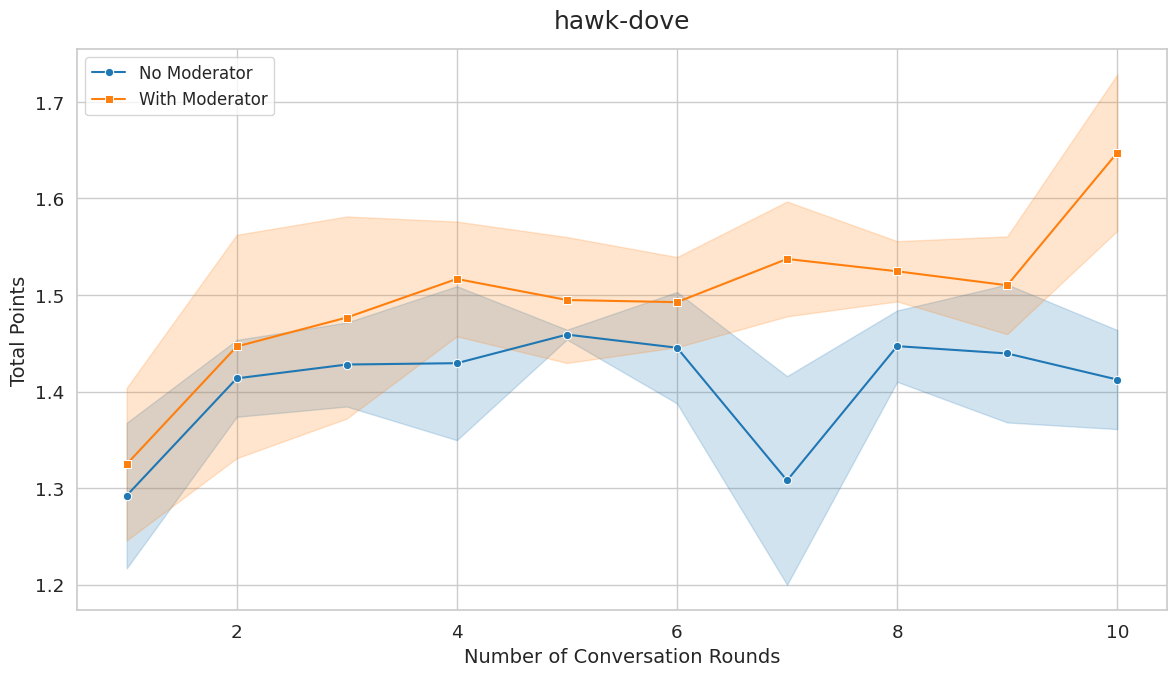

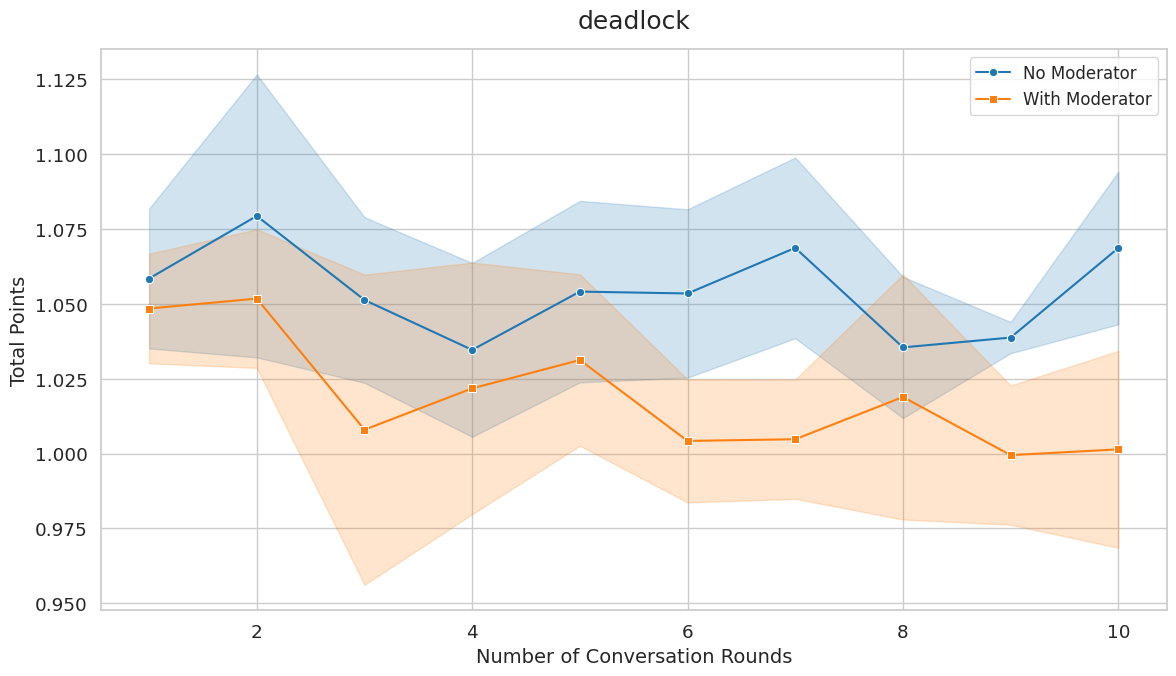

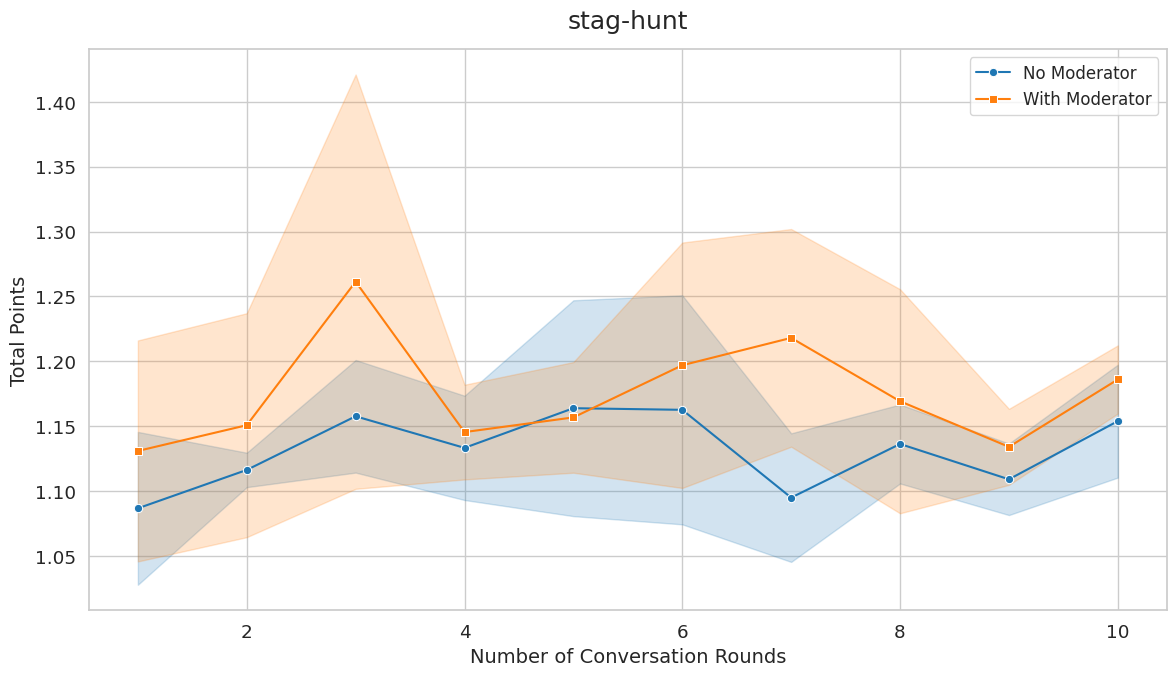

In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Set the style
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)
custom_palette = ['#1f77b4', '#ff7f0e']

for game in games:
    plt.figure(figsize=(12, 7))
    
    # Create DataFrame for seaborn
    plot_data = []
    for idx, condition in enumerate(['No Moderator', 'With Moderator']):
        means = total_points[game].mean(axis=-1)[:, idx]
        std_devs = total_points[game].std(axis=-1)[:, idx]
        rounds = np.arange(1, len(means) + 1)
        
        for round_num, mean, std in zip(rounds, means, std_devs):
            plot_data.append({
                'Round': round_num,
                'Points': mean,
                'Std': std,
                'Condition': condition
            })
    
    df = pd.DataFrame(plot_data)
    
    # Create the line plot
    ax = sns.lineplot(
        data=df,
        x='Round',
        y='Points',
        hue='Condition',
        style='Condition',
        palette=custom_palette,
        markers=['o', 's'],
        dashes=False
    )

    # Add colored error boundaries
    for condition in ['No Moderator', 'With Moderator']:
        condition_data = df[df['Condition'] == condition]
        ax.fill_between(
            condition_data['Round'],
            condition_data['Points'] - condition_data['Std'],
            condition_data['Points'] + condition_data['Std'],
            alpha=0.2,  # lighter transparency
            color=ax.get_lines()[['No Moderator', 'With Moderator'].index(condition)].get_color()
        )

    plt.title(game, fontsize=18, pad=15)
    plt.xlabel('Number of Conversation Rounds', fontsize=14)
    plt.ylabel('Total Points', fontsize=14)
    plt.legend(title=None, frameon=True, fontsize=12)
    plt.tight_layout()
    plt.savefig(f'plots/{game}_plot.pdf')  # Save the plot as a PDF
    plt.show()

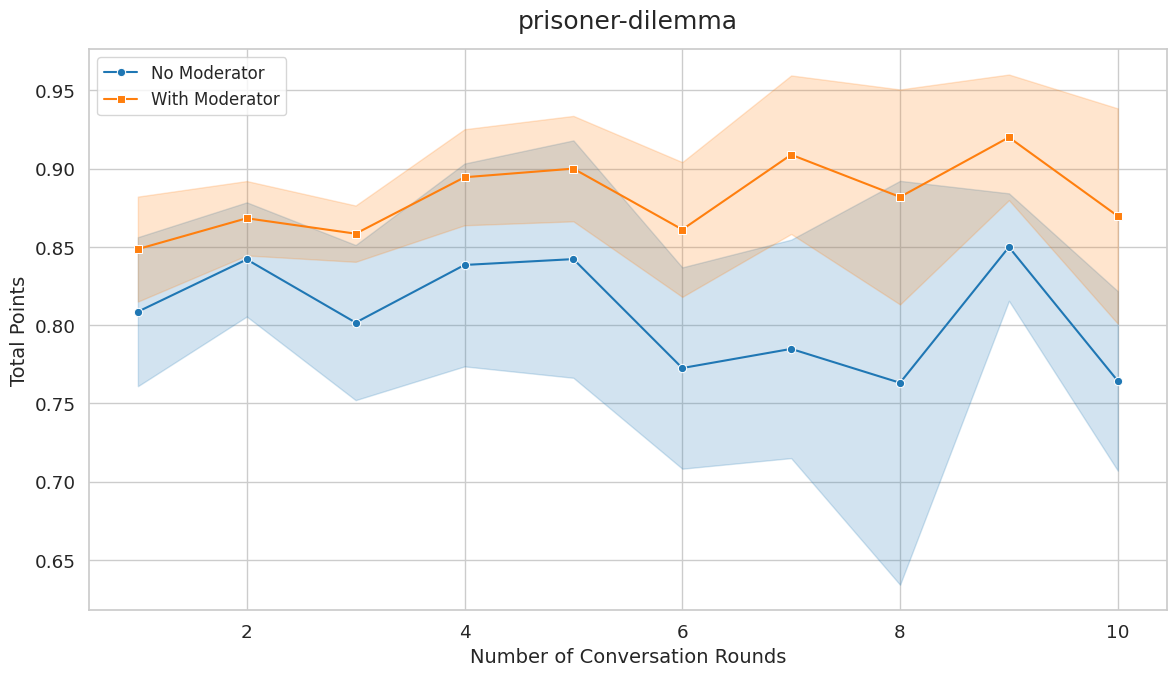

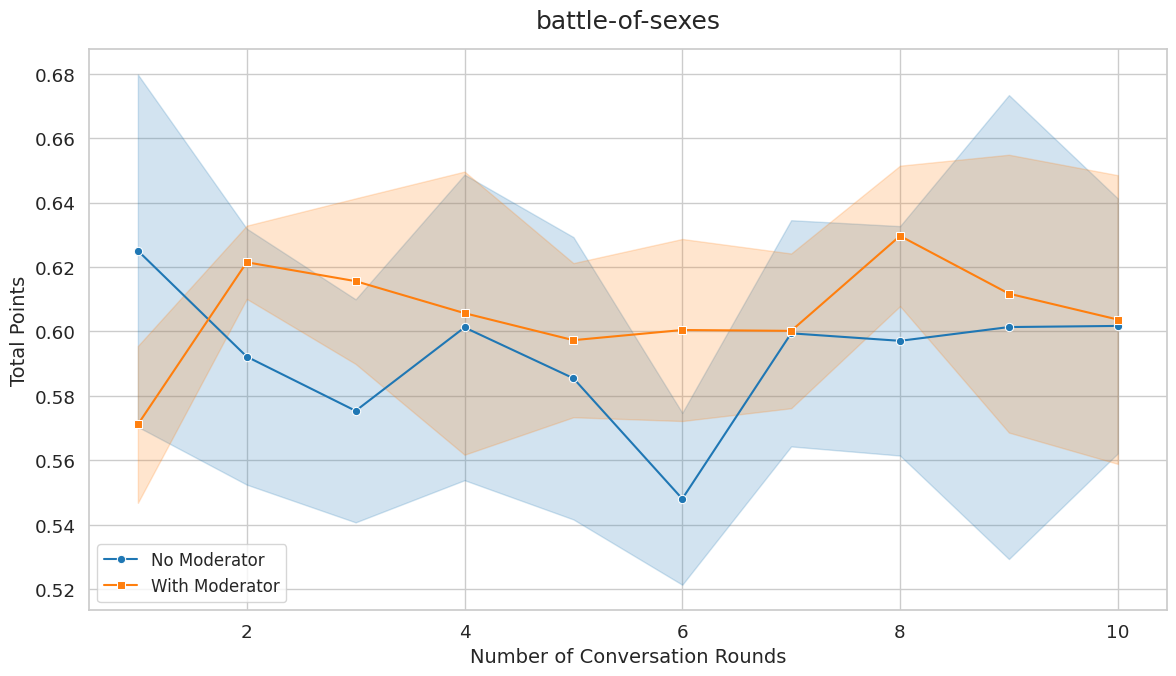

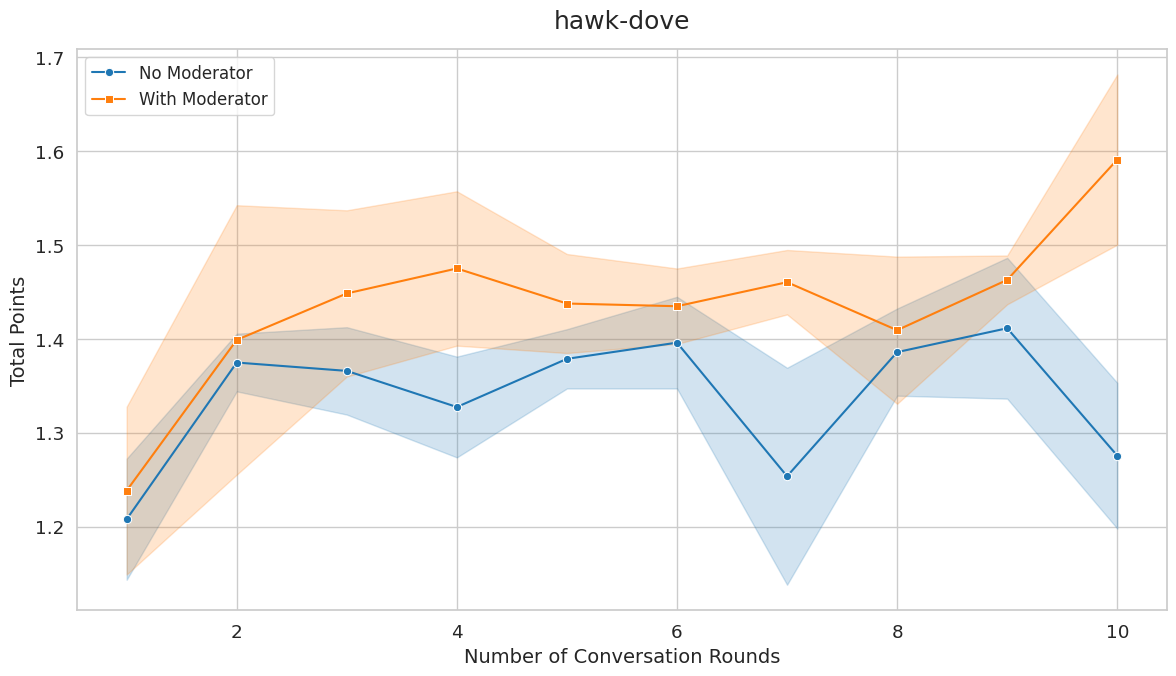

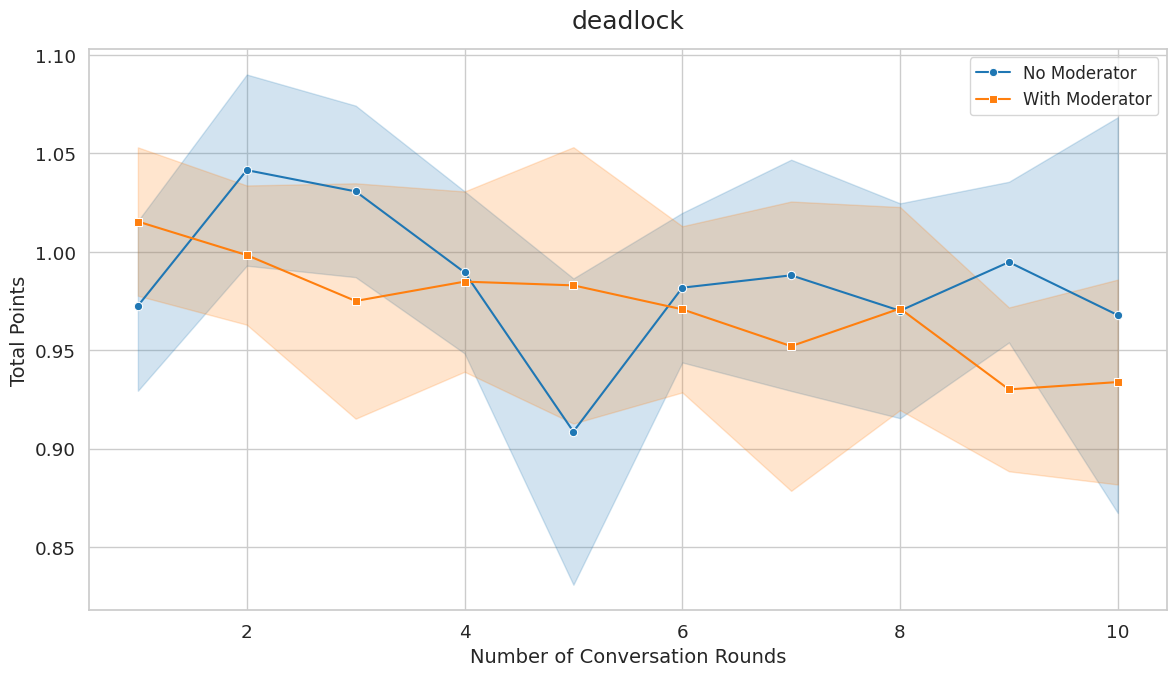

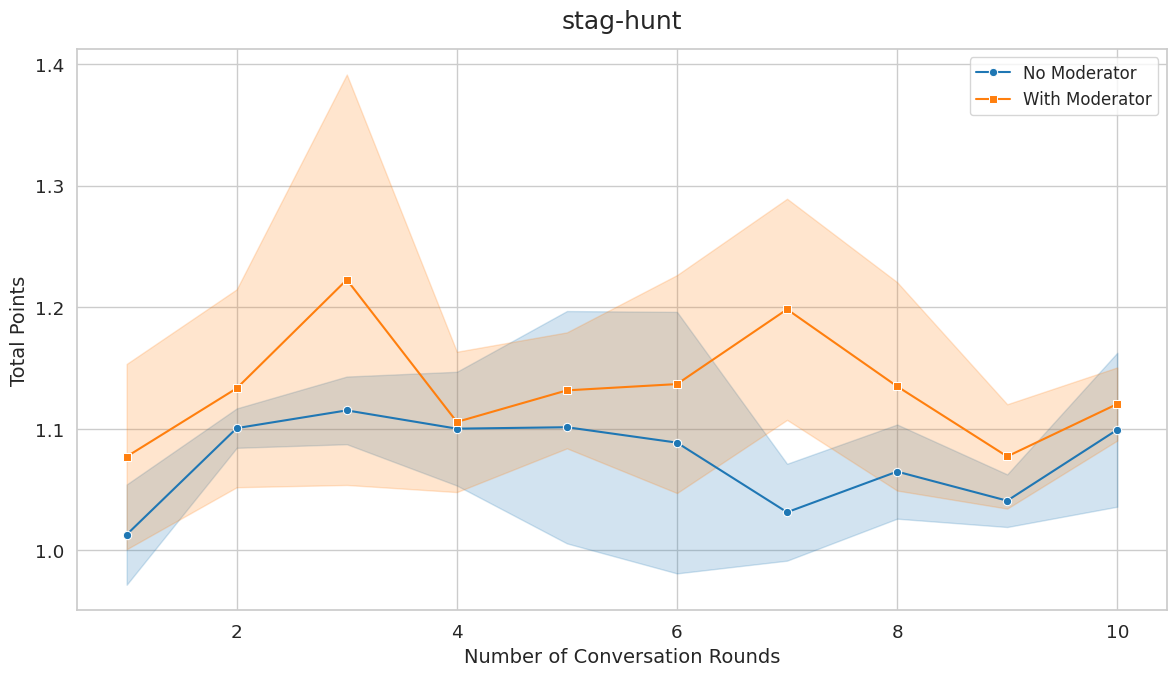

In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Set the style
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)
custom_palette = ['#1f77b4', '#ff7f0e']

for game in games:
    plt.figure(figsize=(12, 7))
    
    # Create DataFrame for seaborn
    plot_data = []
    for idx, condition in enumerate(['No Moderator', 'With Moderator']):
        means = quantitative[game].mean(axis=-1)[:, idx]
        std_devs = quantitative[game].std(axis=-1)[:, idx]
        rounds = np.arange(1, len(means) + 1)
        
        for round_num, mean, std in zip(rounds, means, std_devs):
            plot_data.append({
                'Round': round_num,
                'Points': mean,
                'Std': std,
                'Condition': condition
            })
    
    df = pd.DataFrame(plot_data)
    
    # Create the line plot
    ax = sns.lineplot(
        data=df,
        x='Round',
        y='Points',
        hue='Condition',
        style='Condition',
        palette=custom_palette,
        markers=['o', 's'],
        dashes=False
    )

    # Add colored error boundaries
    for condition in ['No Moderator', 'With Moderator']:
        condition_data = df[df['Condition'] == condition]
        ax.fill_between(
            condition_data['Round'],
            condition_data['Points'] - condition_data['Std'],
            condition_data['Points'] + condition_data['Std'],
            alpha=0.2,  # lighter transparency
            color=ax.get_lines()[['No Moderator', 'With Moderator'].index(condition)].get_color()
        )

    plt.title(game, fontsize=18, pad=15)
    plt.xlabel('Number of Conversation Rounds', fontsize=14)
    plt.ylabel('Total Points', fontsize=14)
    plt.legend(title=None, frameon=True, fontsize=12)
    plt.tight_layout()
    plt.savefig(f'plots/{game}_plot.pdf')  # Save the plot as a PDF
    plt.show()

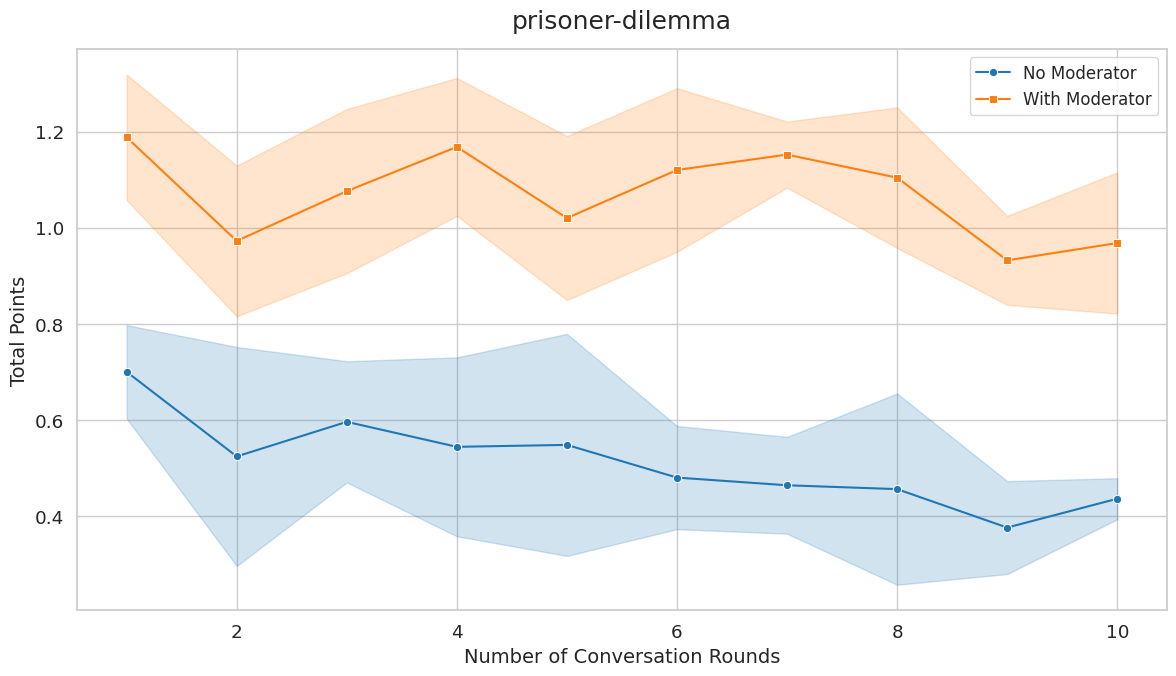

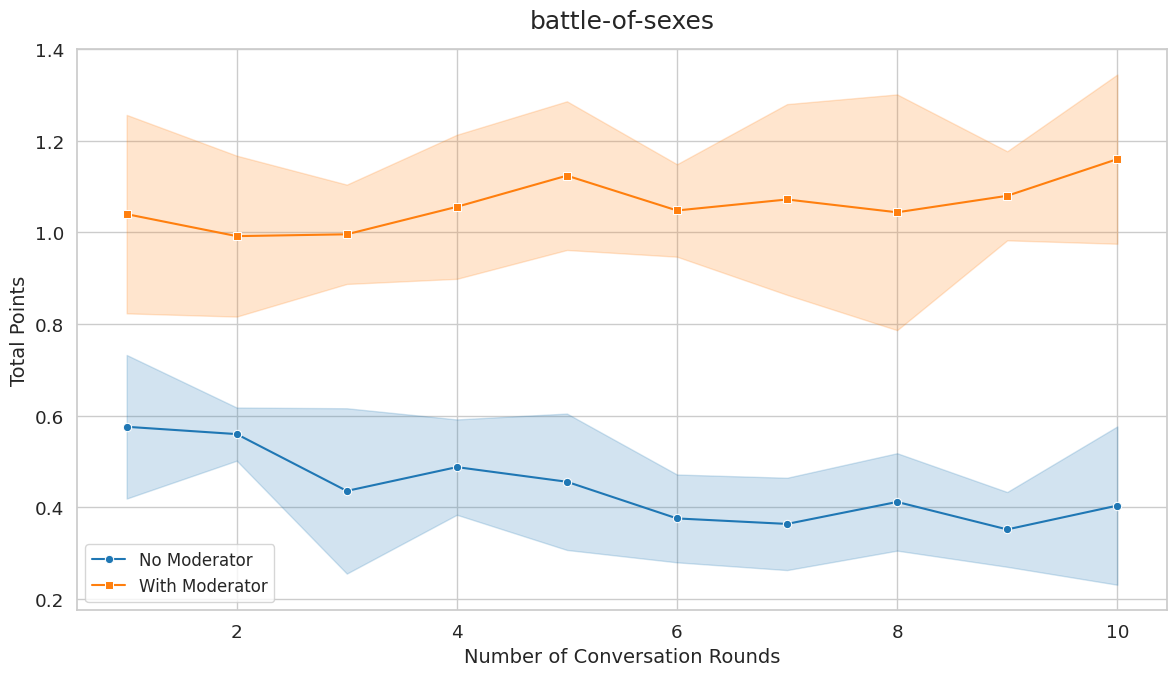

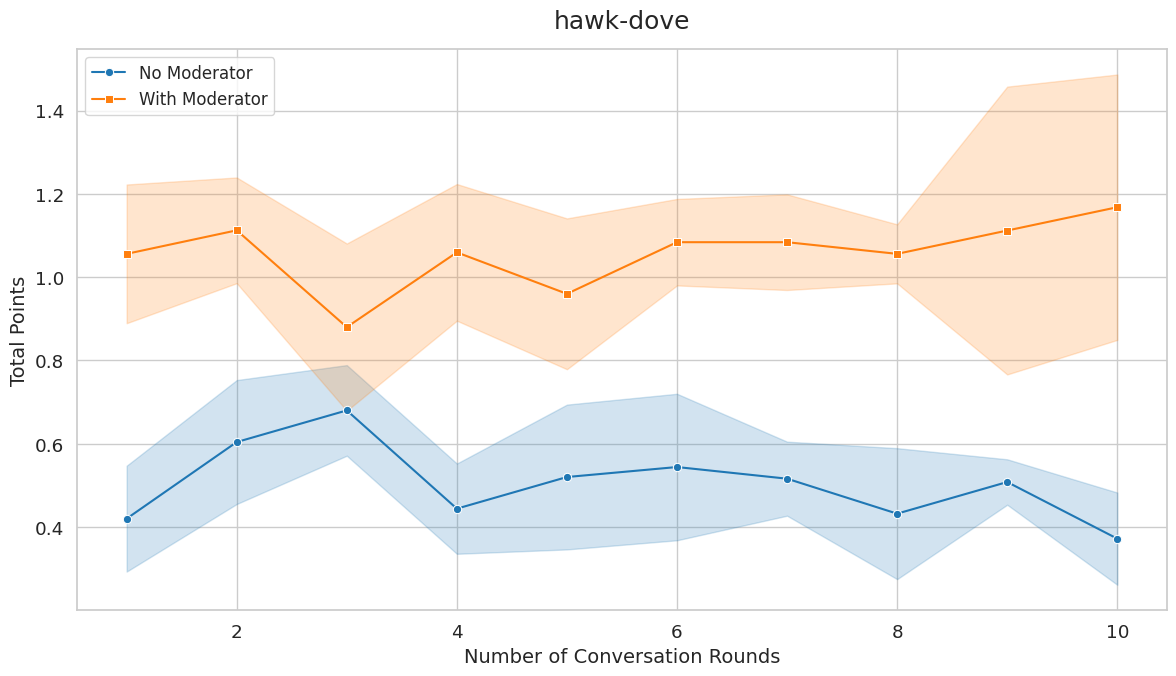

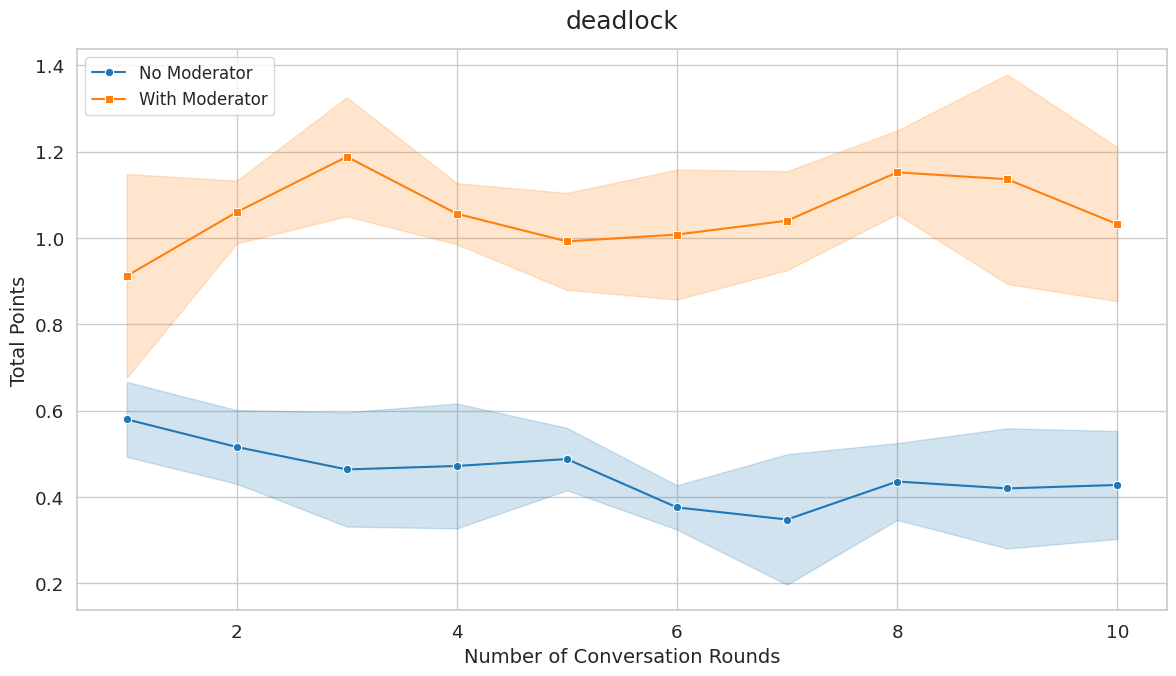

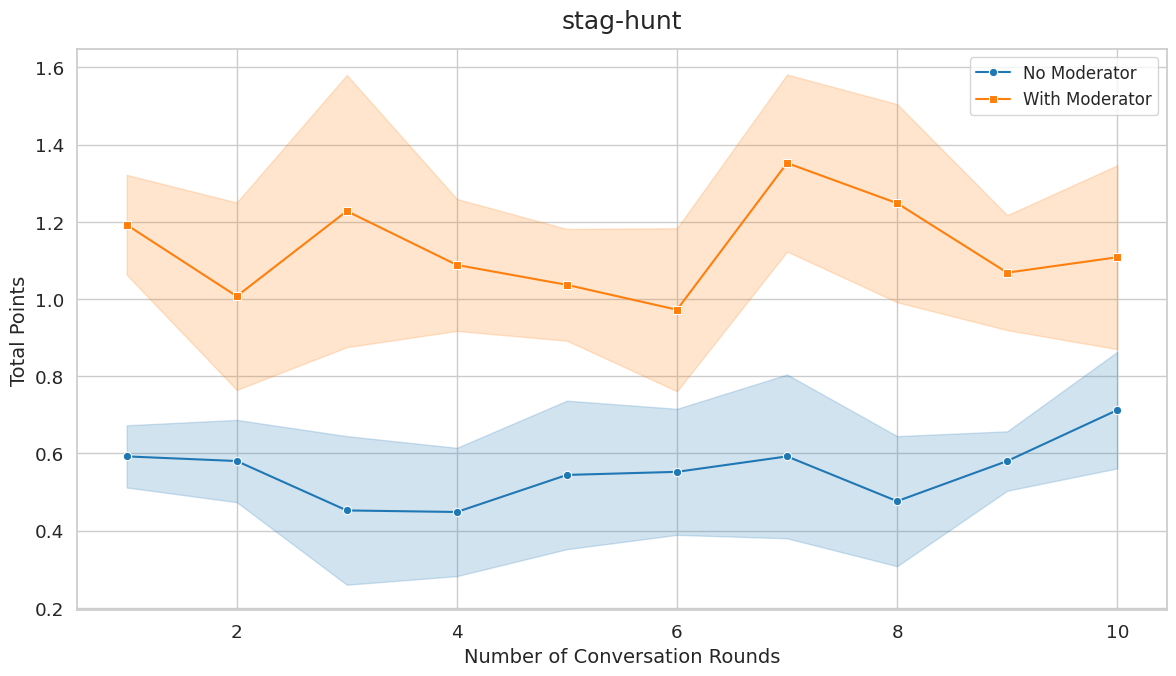

In [8]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Set the style
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)
custom_palette = ['#1f77b4', '#ff7f0e']

for game in games:
    plt.figure(figsize=(12, 7))
    
    # Create DataFrame for seaborn
    plot_data = []
    for idx, condition in enumerate(['No Moderator', 'With Moderator']):
        means = qualitative[game].mean(axis=-1)[:, idx]
        std_devs = qualitative[game].std(axis=-1)[:, idx]
        rounds = np.arange(1, len(means) + 1)
        
        for round_num, mean, std in zip(rounds, means, std_devs):
            plot_data.append({
                'Round': round_num,
                'Points': mean,
                'Std': std,
                'Condition': condition
            })
    
    df = pd.DataFrame(plot_data)
    
    # Create the line plot
    ax = sns.lineplot(
        data=df,
        x='Round',
        y='Points',
        hue='Condition',
        style='Condition',
        palette=custom_palette,
        markers=['o', 's'],
        dashes=False
    )

    # Add colored error boundaries
    for condition in ['No Moderator', 'With Moderator']:
        condition_data = df[df['Condition'] == condition]
        ax.fill_between(
            condition_data['Round'],
            condition_data['Points'] - condition_data['Std'],
            condition_data['Points'] + condition_data['Std'],
            alpha=0.2,  # lighter transparency
            color=ax.get_lines()[['No Moderator', 'With Moderator'].index(condition)].get_color()
        )

    plt.title(game, fontsize=18, pad=15)
    plt.xlabel('Number of Conversation Rounds', fontsize=14)
    plt.ylabel('Total Points', fontsize=14)
    plt.legend(title=None, frameon=True, fontsize=12)
    plt.tight_layout()
    plt.savefig(f'plots/{game}_plot.pdf')  # Save the plot as a PDF
    plt.show()